# SIT225: Data Analysis & interpretation

Run each cell to generate output and finally convert this notebook to PDF.

In [1]:
# Fill in student ID and name
# 
student_id = "Zakarya Guerinat"
student_first_last_name = "217"
print(student_id, student_first_last_name)

Zakarya Guerinat 217


# 1. Descriptive Statistics

Descriptive statistics summarizes important features of a data set such as:
* Count
* Sum
* Standard deviation
* Percentile
* Average 

In [15]:
# Make sure necessary packages are already installed.
!pip install pandas numpy seaborn

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

full_health_data = pd.read_csv("full_health_data.csv", header=0, sep=",")
print (full_health_data.describe())


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
         Duration  Average_Pulse   Max_Pulse  Calorie_Burnage  Hours_Work  \
count  163.000000     163.000000  163.000000       163.000000  163.000000   
mean    64.263804     107.723926  134.226994       382.368098    4.386503   
std     42.994520      14.625062   16.403967       274.227106    3.923772   
min     15.000000      80.000000  100.000000        50.000000    0.000000   
25%     45.000000     100.000000  124.000000       256.500000    0.000000   
50%     60.000000     105.000000  131.000000       320.000000    5.000000   
75%     60.000000     111.000000  141.000000       388.500000    8.000000   
max    300.000000     159.000000  184.000000      1860.000000   11.000000   

       Hours_Sleep  
count   163.000000  
mean      7.680982  
std       0.663934  
min       5.000000  
25%       7.500000  
50%       8.000000  
75%       8.000000  
max      12.000000  


## 1.1 Percentile
### 25%, 50% and 75% - Percentiles

Observe the output of the above cell for 25%, 50% and 75% of all the columns.
Let's explain for Average_Pulse:
* 25% of all of the training sessions have an average pulse of 100 beats per minute or lower. If we flip the statement, it means that 75% of all of the training sessions have an average pulse of 100 beats per minute or higher.
* 75% of all the training session have an average pulse of 111 or lower. If we flip the statement, it means that 25% of all of the training sessions have an average pulse of 111 beats per minute or higher.

In [ ]:
avg_pulse = full_health_data["Average_Pulse"]
print("parcentile_10", np.percentile(avg_pulse, 10) )
print("parcentile_25", np.percentile(avg_pulse, 25) )
print("parcentile_50", np.percentile(avg_pulse, 50) )
print("parcentile_75", np.percentile(avg_pulse, 75) )



parcentile_10 92.2
parcentile_25 100.0
parcentile_50 105.0
parcentile_75 111.0


### Question: Calculate percentiles for Max_Pulse.
You should answer a follow up question in the activity sheet.

In [28]:
# Percentiles for Max_Pulse
percentiles = [10, 25, 50, 75]  # in percentages
results = {}

for p in percentiles:
    results[f"{p}%"] = np.percentile(df["Max_Pulse"].dropna(), p)

# Show nicely as a DataFrame
import pandas as pd
pd.DataFrame.from_dict(results, orient="index", columns=["Max_Pulse"])

,Max_Pulse
10%,120.0
25%,124.0
50%,131.0
75%,141.0


## 1.2 Standard Deviation
Standard deviation is a number that describes how spread out the observations are.

A mathematical function will have difficulties in predicting precise values, if the observations are "spread". Standard deviation is a measure of uncertainty.

A low standard deviation means that most of the numbers are close to the mean (average) value.

A high standard deviation means that the values are spread out over a wider range.

In [18]:
import numpy as np

# We can use the std() function from Numpy to find the standard deviation of a variable:

std = np.std(full_health_data)
print(std)

Duration            42.862432
Average_Pulse       14.580131
Max_Pulse           16.353571
Calorie_Burnage    273.384624
Hours_Work           3.911718
Hours_Sleep          0.661895
dtype: float64


/Users/amen/Desktop/SIT225_2025_T2/week-7/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



### 1.2.1 Coefficient of variation

In the above cell, what does standard deviation numbers mean?

The coefficient of variation is used to get an idea of how large the standard deviation is.

Mathematically, the coefficient of variation is defined as: $$Coefficient of Variation = Standard Deviation / Mean$$

In [19]:
cv = np.std(full_health_data) / np.mean(full_health_data)
print(cv)

# We see that the variables Duration and Calorie_Burnage has 
# a high Standard Deviation compared to Max_Pulse, Average_Pulse and Hours_Sleep.
# 

Duration           0.367051
Average_Pulse      0.124857
Max_Pulse          0.140043
Calorie_Burnage    2.341122
Hours_Work         0.033498
Hours_Sleep        0.005668
dtype: float64


## 1.3 Variance
Variance is another number that indicates how spread out the values are.

In fact, if you take the square root of the variance, you get the standard deviation. Or the other way around, if you multiply the standard deviation by itself, you get the variance!

In [20]:
var = np.var(full_health_data)
print(var)

Duration            1837.188076
Average_Pulse        212.580225
Max_Pulse            267.439271
Calorie_Burnage    74739.152847
Hours_Work            15.301536
Hours_Sleep            0.438105
dtype: float64


/Users/amen/Desktop/SIT225_2025_T2/week-7/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning:

The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



## 1.4 Correlation

Correlation measures the relationship between two variables.

A function has a purpose to predict a value, by converting input (x) to output (f(x)). We can say also say that a function uses the relationship between two variables for prediction.

### Correlation Coefficient
The correlation coefficient measures the relationship between two variables.

The correlation coefficient can never be less than -1 or higher than 1.
* 1 = there is a perfect linear relationship between the variables
* 0 = there is no linear relationship between the variables
* -1 = there is a perfect negative linear relationship between the variables

#### Perfect Linear Relationship (Correlation Coefficient = 1)

it exists a perfect linear relationship between Average_Pulse and Calorie_Burnage.

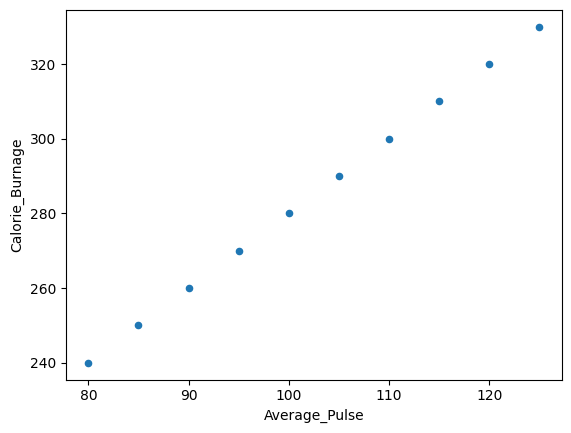

In [21]:
# Positive correlation
# 

import matplotlib.pyplot as plt

def create_linear_health_data():
    data = [
        {'Duration':30, 'Average_Pulse':80, 'Max_Pulse':120,'Calorie_Burnage':240,'Hours_Work':10,'Hours_Sleep':7},
        {'Duration':45, 'Average_Pulse':85, 'Max_Pulse':120,'Calorie_Burnage':250,'Hours_Work':10,'Hours_Sleep':7},
        {'Duration':45, 'Average_Pulse':90, 'Max_Pulse':130,'Calorie_Burnage':260,'Hours_Work':8,'Hours_Sleep':7},
        {'Duration':60, 'Average_Pulse':95, 'Max_Pulse':130,'Calorie_Burnage':270,'Hours_Work':8,'Hours_Sleep':7},
        {'Duration':60, 'Average_Pulse':100, 'Max_Pulse':140,'Calorie_Burnage':280,'Hours_Work':0,'Hours_Sleep':7},
        {'Duration':60, 'Average_Pulse':105, 'Max_Pulse':140,'Calorie_Burnage':290,'Hours_Work':7,'Hours_Sleep':8},
        {'Duration':60, 'Average_Pulse':110, 'Max_Pulse':145,'Calorie_Burnage':300,'Hours_Work':7,'Hours_Sleep':8},
        {'Duration':45, 'Average_Pulse':115, 'Max_Pulse':145,'Calorie_Burnage':310,'Hours_Work':8,'Hours_Sleep':8},
        {'Duration':60, 'Average_Pulse':120, 'Max_Pulse':150,'Calorie_Burnage':320,'Hours_Work':0,'Hours_Sleep':8},
        {'Duration':45, 'Average_Pulse':125, 'Max_Pulse':150,'Calorie_Burnage':330,'Hours_Work':8,'Hours_Sleep':8},
    ]
    return data

health_data = pd.DataFrame.from_dict(create_linear_health_data())
health_data.plot(x ='Average_Pulse', y='Calorie_Burnage', kind='scatter')
plt.show()

#### Perfect Negative Linear Relationship (Correlation Coefficient = -1)

We have plotted fictional data here. The x-axis represents the amount of hours worked at our job before a training session. The y-axis is Calorie_Burnage.

If we work longer hours, we tend to have lower calorie burnage because we are exhausted before the training session.

The correlation coefficient here is -1.

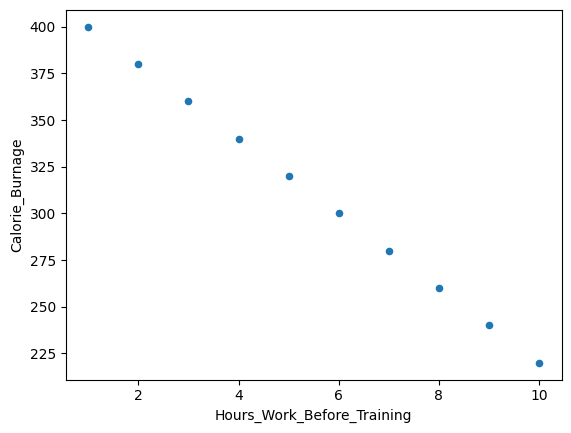

In [22]:
# Negative correlation
# 
negative_corr = {'Hours_Work_Before_Training': [10,9,8,7,6,5,4,3,2,1],
'Calorie_Burnage': [220,240,260,280,300,320,340,360,380,400]}
negative_corr = pd.DataFrame(data=negative_corr)

negative_corr.plot(x ='Hours_Work_Before_Training', y='Calorie_Burnage', kind='scatter')
plt.show()

##### No Linear Relationship (Correlation coefficient = 0)

As you can see, there is no linear relationship between the two variables. It means that longer training session does not lead to higher Max_Pulse.

The correlation coefficient here is 0.

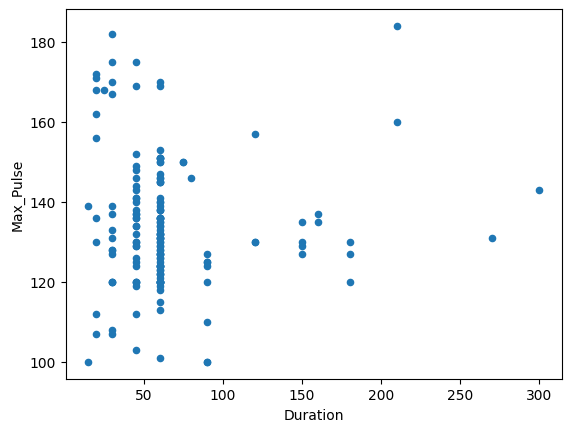

In [23]:
full_health_data.plot(x ='Duration', y='Max_Pulse', kind='scatter')
plt.show()

## 1.5 Correlation Matrix

A matrix is an array of numbers arranged in rows and columns.

A correlation matrix is simply a table showing the correlation coefficients between variables.

We can use the corr() function in Python to create a correlation matrix. We also use the round() function to round the output to two decimals:

In [24]:
Corr_Matrix = round(full_health_data.corr(),2)
print(Corr_Matrix)

# Drop 2 columns - Hours_Work and Hours_Sleep to view the matrix nice.
# 
health_part = full_health_data.drop(columns=['Hours_Work', 'Hours_Sleep'])
Corr_Matrix = round(health_part.corr(),2)
print(Corr_Matrix)

                 Duration  Average_Pulse  Max_Pulse  Calorie_Burnage  \
Duration             1.00          -0.17       0.00             0.89   
Average_Pulse       -0.17           1.00       0.79             0.02   
Max_Pulse            0.00           0.79       1.00             0.20   
Calorie_Burnage      0.89           0.02       0.20             1.00   
Hours_Work          -0.12          -0.28      -0.27            -0.14   
Hours_Sleep          0.07           0.03       0.09             0.08   

                 Hours_Work  Hours_Sleep  
Duration              -0.12         0.07  
Average_Pulse         -0.28         0.03  
Max_Pulse             -0.27         0.09  
Calorie_Burnage       -0.14         0.08  
Hours_Work             1.00        -0.14  
Hours_Sleep           -0.14         1.00  
                 Duration  Average_Pulse  Max_Pulse  Calorie_Burnage
Duration             1.00          -0.17       0.00             0.89
Average_Pulse       -0.17           1.00       0.79     

##### Using a Heatmap

We can use a Heatmap to Visualize the Correlation Between Variables:

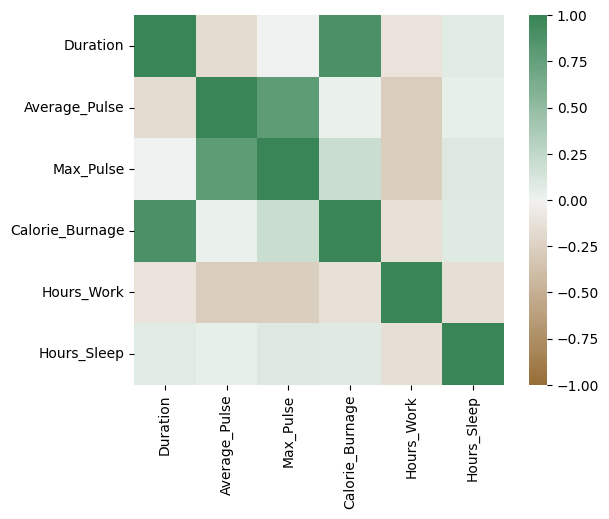

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_full_health = full_health_data.corr()

axis_corr = sns.heatmap(
    correlation_full_health,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    square=True
)

plt.show()

## 1.6 Correlation Does not imply Causality

Correlation measures the numerical relationship between two variables.

A high correlation coefficient (close to 1), does not mean that we can for sure conclude an actual relationship between two variables.

A classic example:

* During the summer, the sale of ice cream at a beach increases
* Simultaneously, drowning accidents also increase as well

**Question:** Does this mean that increase of ice cream sale is a direct cause of increased drowning accidents?



## 1.7 Linear Regression

The term regression is used when you try to find the relationship between variables.

In Machine Learning and in statistical modeling, that relationship is used to predict the outcome of events.

We will use Scikit-learn to train various regression models. Scikit-learn is a popular Machine Learning (ML) library that offers various tools for creating and training ML algorithms, feature engineering, data cleaning, and evaluating and testing models. It was designed to be accessible, and to work seamlessly with popular libraries like NumPy and Pandas.

We see how to apply a simple regression model for predicting Calorie_Burnage on various factors such as Average_Pulse or Duration.


In [26]:
!pip install seaborn plotly

import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

df = full_health_data
X = df.Average_Pulse.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.Calorie_Burnage)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='Average_Pulse', y='Calorie_Burnage', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


#### Question:

We have seen earlier how to apply a simple regression model for predicting Calorie_Burnage from Average_Pulse. There might be another candidate Duration in addition to Average_Pulse. You will need to repeat the above linear regression process to find relationsthip between Calorie_Burnage and Duration.

Comment on the both regression lines: Calorie_Burnage - Average_Pulse and Calorie_Burnage - Duration. 

In [29]:
# Model B: Predict Calorie_Burnage from Duration
Xb = df[["Duration"]].dropna()
yb = df.loc[Xb.index, "Calorie_Burnage"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

mB = LinearRegression().fit(Xb_train, yb_train)
yb_pred = mB.predict(Xb_test)

print("Model B — Calorie_Burnage ~ Duration")
print("R^2 (test):", r2_score(yb_test, yb_pred))
print("MAE (test):", mean_absolute_error(yb_test, yb_pred))
print("Coeff (Duration):", mB.coef_[0], "Intercept:", mB.intercept_)

# Regression line plot vs Duration
grid_b = np.linspace(Xb["Duration"].min(), Xb["Duration"].max(), 200).reshape(-1,1)
grid_b_df = pd.DataFrame(grid_b, columns=["Duration"])   # add feature name
line_b = mB.predict(grid_b_df)
fig_b = px.scatter(x=Xb["Duration"], y=yb,
                   labels={"x":"Duration", "y":"Calorie_Burnage"},
                   title="Model B: Calorie vs Duration")
fig_b.add_scatter(x=grid_b_df["Duration"], y=line_b,
                  mode="lines", name="Regression line")
fig_b.show()

Model B — Calorie_Burnage ~ Duration
R^2 (test): 0.871707336179915
MAE (test): 83.64437495691111
Coeff (Duration): 5.19803082301829 Intercept: 44.53951850280856
